# Question 1 - K-means clustering

## Q1 - 1

![alt text](https://drive.google.com/uc?id=1LnEpiHWcG9vNYD12mwGycnL4t46fzQkw)

![alt text](https://drive.google.com/uc?id=1XHrURxToyQEtzl-1p3az871kuj2GaRQS)

![alt text](https://drive.google.com/uc?id=10eCSOm-YhweRqbOxUlP5booPqG0_fOLR)

![alt text](https://drive.google.com/uc?id=1q57alnO6Q-63367ty_AXiAmfJ4l-QSiK)

## Q1 - 2

**a)	How does the choice of the initial starting points affect the clustering?**

*   The choice of the initial   cluster   centers have direct effect on the structure  of  the  final  clusters  obtained  at  the  end  of  the  iteration.  A good choice of the initial centers would have **small error percentages** and  **higher Rand index**. 

*   The inital choice of the starting points would also have an effect on the **running time** of the algorithm. K-means is always made to converge but may be to a local minimum. 

*   In the first diagram, after the completion of one run of k-means algorithm with the random init method, we see the clustering converged to a local optimum with not so good quality. In a similar way, for the second diagram using another random initialization, the k-means converged to another local optimum with a low quality output.

*  Hence, in order to obtain the global minimum, the algorithm is run with different initial random initializations. Thus, it greatly affects the performance of the clustering technique as it **increases the time complexity of the algorithm**. 

*  A very bad initial starting point would lead to a greater number of runs of k-means with new initializations of cluster centers in order to actually find out the global minimum. However, since the initialization is done using the random init method, we do do have much control on the performance. 

**b)	How can you avoid getting a clustering result that is dependent on the initialization?**

*   The clustering result can be made independent of the initialization of the cluster centers by using the initialization method of **k-means++**. In the scikit-learn, this can be used by setting the parameter **init='k-means++'** of the k-means function call.

*   
k-means++ employs an intelligent way of selecting cluster centers that speeds up convergence. This initializes the centroids to be distant from each other, leading to probably better results than random initialization.


**c)	What are the benefits and drawbacks of the k-means clustering?**

**Benefits of k-means clustering**


*  Speed  - Algorithm converges very fast in the complexity of O(n*k*d*i), where n = #samples; d = #variables; i = #iterations; k = #clusters

* The implementation of this approach is relatively simple. 

* The algoruthm can scale to large datasets.

* The convergence of the algorithm is guaranteed.

**Drawbacks of k-means clustering**

*   The choice of the number of clusters is pre-defined. 

*   It can only detect spherical and linealy separable clusters.

*   The technique is sensitive to outliers.

*   It involves hard cluster assignment which means small shifts of a data point can flip cluster membership.

*   Only considers Euclidean distance as a metric to compute distances among the points and the cluster centers. 


## Q1 - 3


### loading data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
cancer = load_breast_cancer()

In [ ]:
# some preprocessing
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
X = X[["mean radius", "mean compactness"]]
X.columns = ['mean_radius','mean_compactness']
Y = pd.DataFrame(cancer.target, columns = ["target"])


### k-means clustering

In [ ]:
# Importing relevant packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.cm as cm


**Plotting the scatterplot for the mean compactness against mean radius with cluster sizes ranging from 2 to 10**

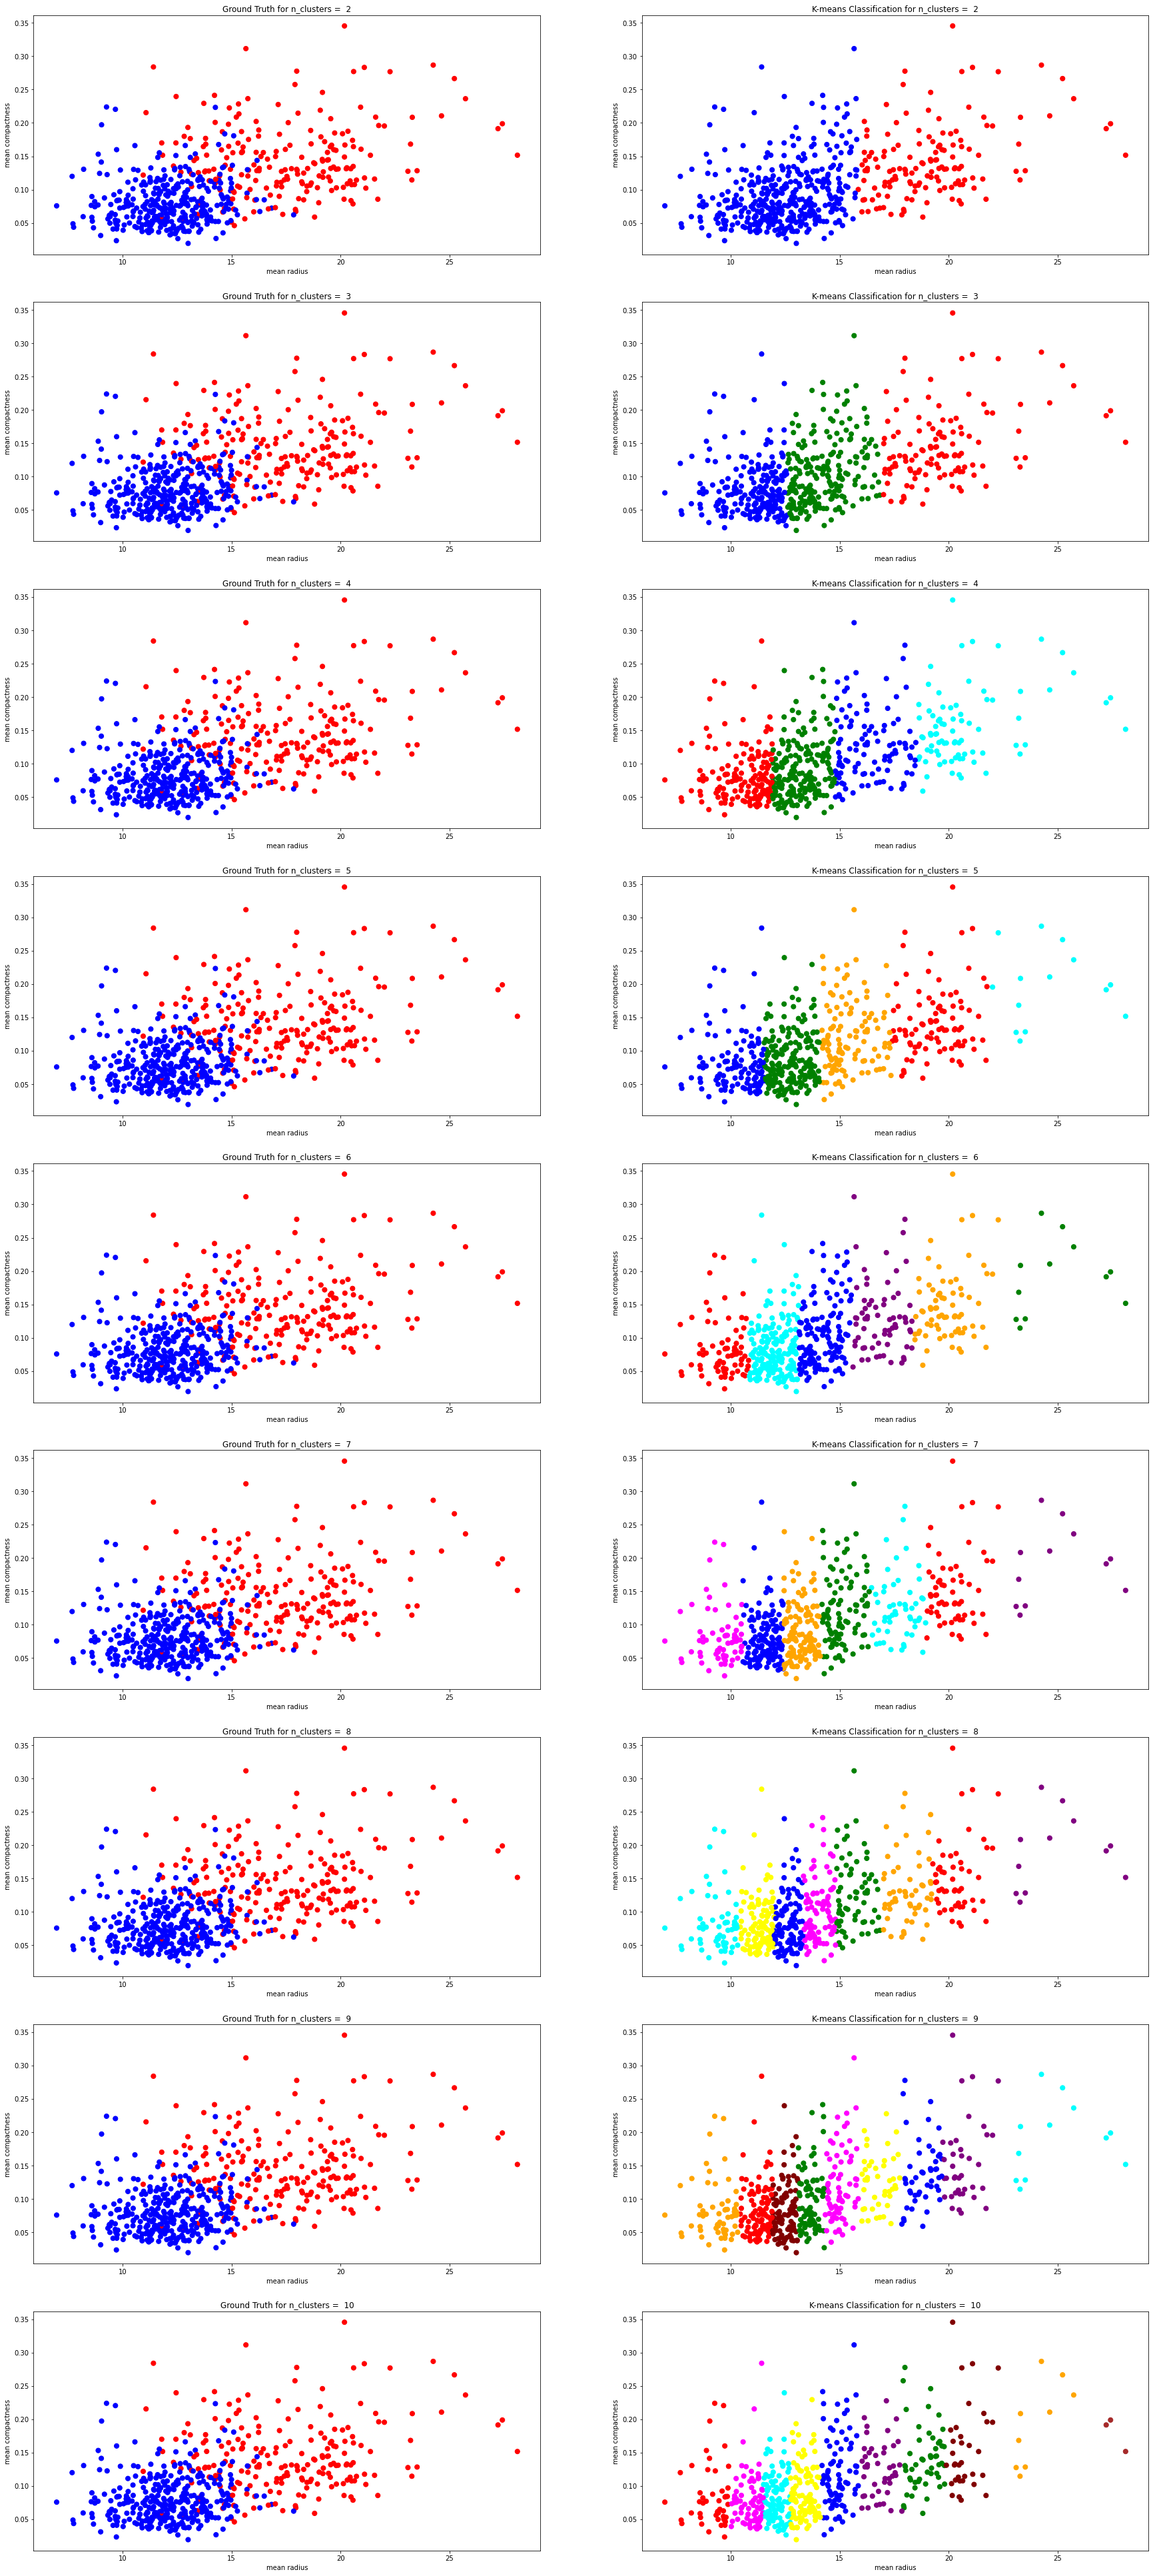

In [ ]:
# Choosing the colours for clustering
colours = np.array(['red','blue','green','cyan','orange','purple','magenta','yellow','maroon', 'brown'])

plt.figure(figsize=(30,70))
c=0

#  # Applying the k-means method for number of cluster in [2,10]
for n_clusters in range(2,11):
   
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=20)
    k_means_clustering.fit(X)
    c = c+1
    plt.subplot(9,2,c)
    plt.scatter(x=X.mean_radius, y=X.mean_compactness, c=colours[Y.target], s=50)
    plt.xlabel("mean radius")
    plt.ylabel("mean compactness")
    plt.title('Ground Truth for n_clusters =  %d' % n_clusters)
    c = c+1
    plt.subplot(9,2,c)
    plt.scatter(x=X.mean_radius, y=X.mean_compactness, c=colours[k_means_clustering.labels_], s=50)
    plt.xlabel("mean radius")
    plt.ylabel("mean compactness")
    plt.title('K-means Classification for n_clusters =  %d' % n_clusters)

**Performing Silhoutte Analysis on k-means Clustering with cluster sizes ranging from 2 to 10**

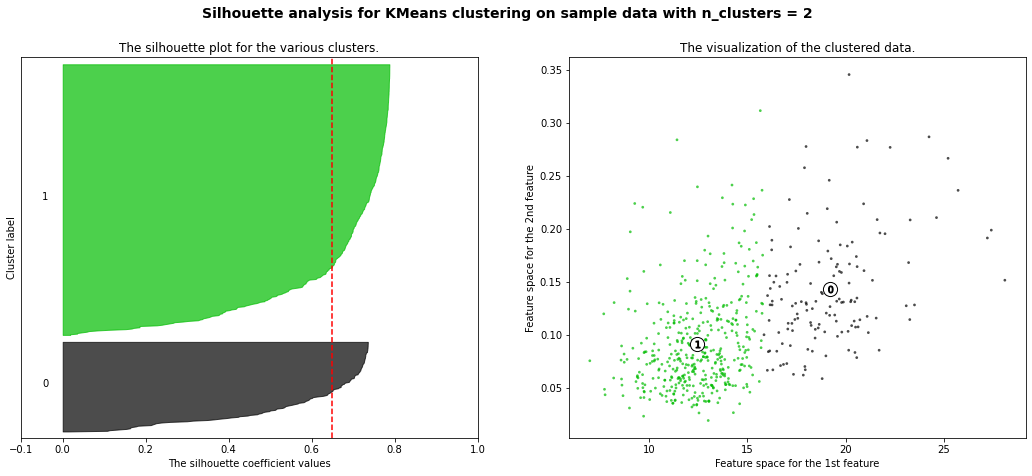

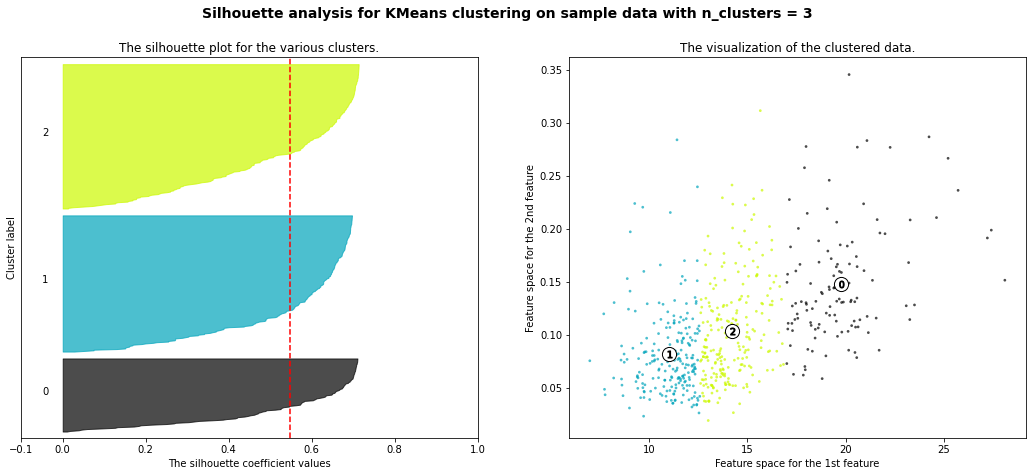

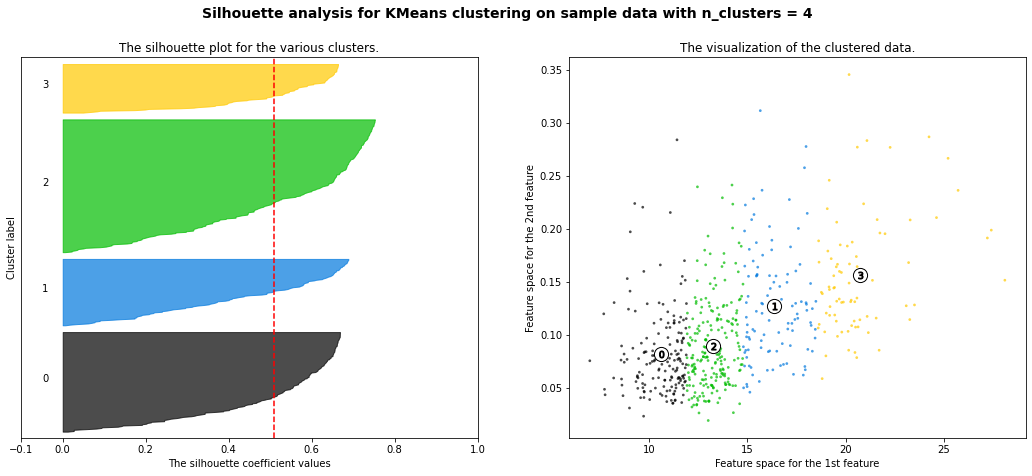

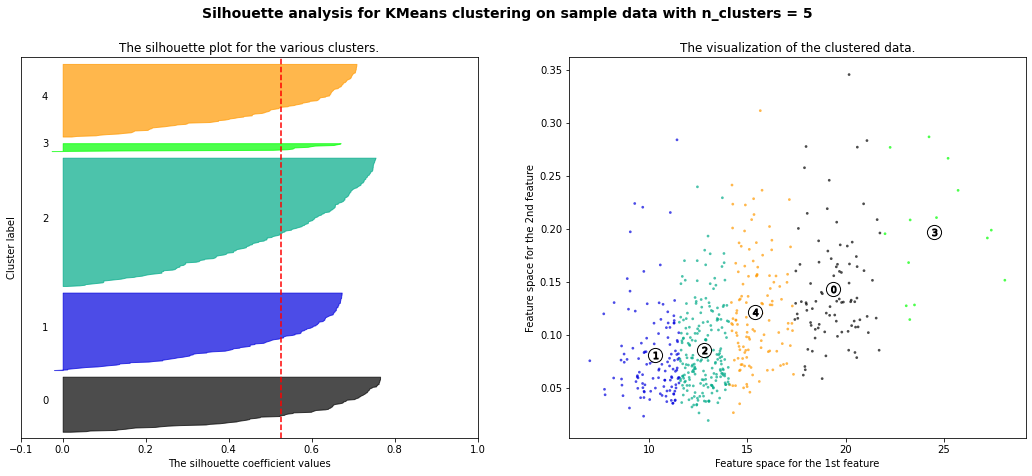

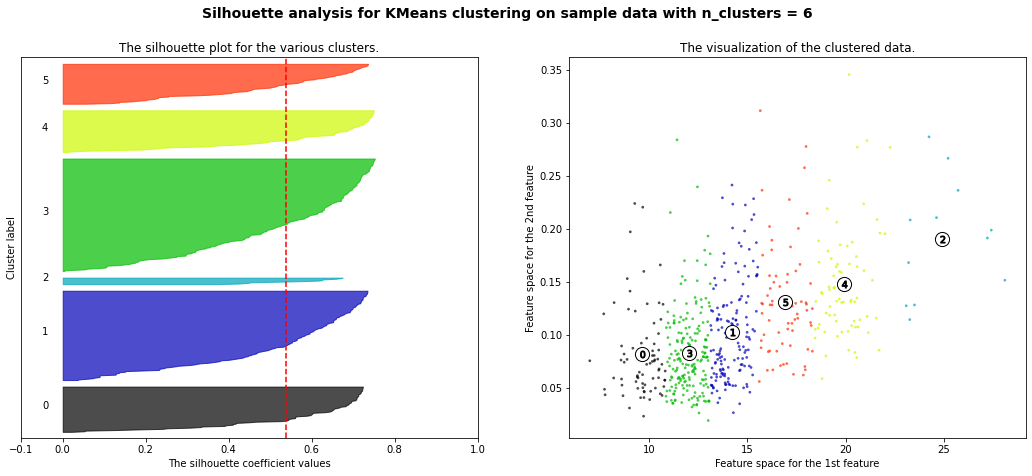

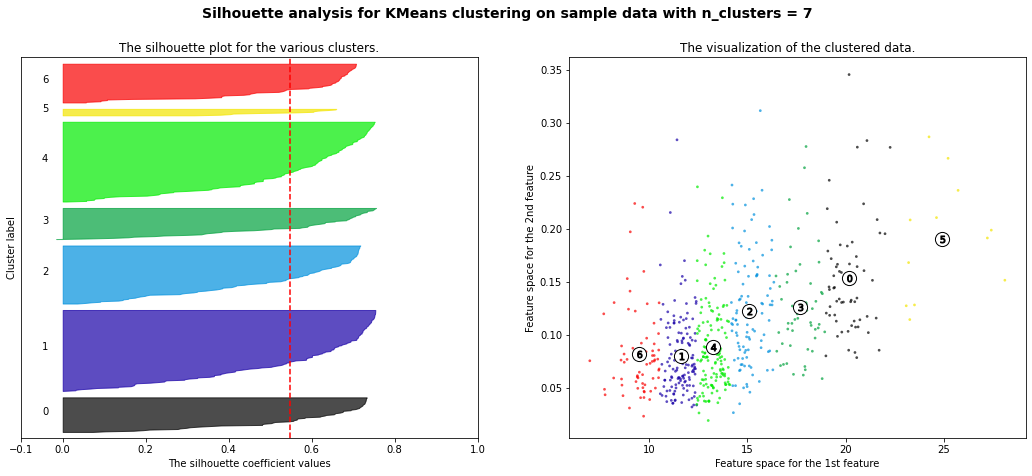

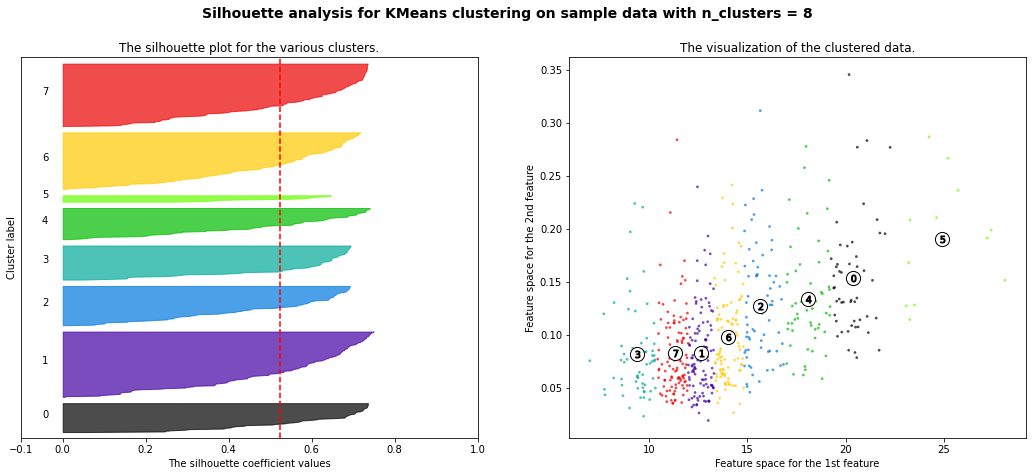

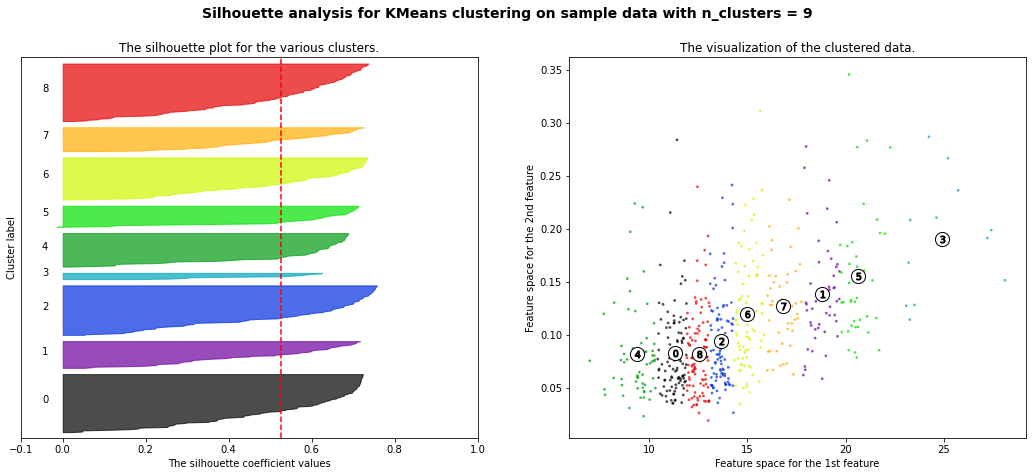

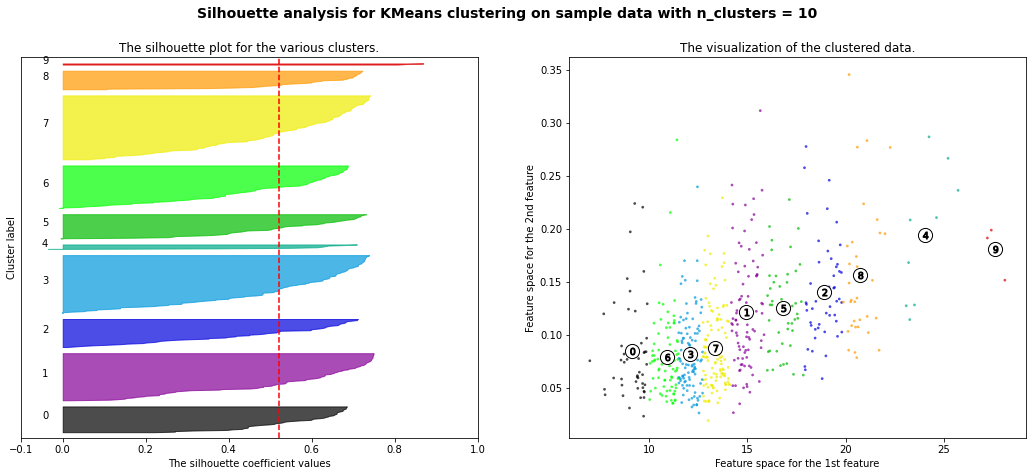

In [ ]:
# The code is developed from the following official documentation
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


# Importing necessary packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Converting the X dataframe to Array
X = X.to_numpy()

# Initializing the average Silhouette coefficients for the different cluster sizes
sc = []

# Calculating the silhouette scores for the number of clusters between [2,10] 
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=20)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    sc.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Average Silhouette coefficients for cluster sizes from range 2 to 10**

In [ ]:
# Printing the average Silhouette coefficient for the clusters
for i in range(2,11):

  print("For n_clusters =", i,"The average silhouette_score is :", sc[i-2])

# Computing the maximum Silhouette coefficient value
k = sc.index(max(sc))
print("")
print("From the silhouette Analysis, the optimal number of clusters = " + str(k+2) + " for which the Silhouette coefficient is the highest")

For n_clusters = 2 The average silhouette_score is : 0.6477646199034238
For n_clusters = 3 The average silhouette_score is : 0.5472660367761588
For n_clusters = 4 The average silhouette_score is : 0.5090731071974303
For n_clusters = 5 The average silhouette_score is : 0.526729695430965
For n_clusters = 6 The average silhouette_score is : 0.5386013465897237
For n_clusters = 7 The average silhouette_score is : 0.547904234982462
For n_clusters = 8 The average silhouette_score is : 0.5240721236455781
For n_clusters = 9 The average silhouette_score is : 0.526091365220981
For n_clusters = 10 The average silhouette_score is : 0.5201012734868713

From the silhouette Analysis, the optimal number of clusters = 2 for which the Silhouette coefficient is the highest


**a) Which is the best choice for the number of clusters? Why?**


*   From the above result, it is clear that with **the number of clusters = 2**, is the best choice in our scenario. 

*   The choice of the number of clusters is directly related to the value of the Silhouette coefficient. The greater the value of the coefficient, the better is the clustering accuracy.

*   In the above code, we calculated the Silhouette coefficients for the clusters with  n_clusters varyng from 2 to 10. 

*   With n_clusters = 2, we get the maximum average Silhouette Coefficient value. Hence, it is the best choice for the number of clusters as it gives the best clustering score among the other choices. 

*  It can also be intuitively verified by the number of target classes, which in our case is also 2.

## Q1 - 4

**Explain the difference between k-means and k-medoids.**


*   In k-means, the cluster center may correspond either to one data points or maybe completely a new data point not present in the dataset. However, in K-medoids, the cluster centers always belong to the data points present. 

*   K-medoids is more robust to outliers as compared to k-means which is heavily affected by strong outliers. 

*   k-means aims at reducing the total squared errors. On the other hand, k-medoids aims at minimizing the sum of dissimilarities among the points in a cluster with the point chosen to be the center of the cluster. 

* Unlike the Euclidean distance metric used in the k-means, K-medoids use the first norm to compute the pariwise distances and also to measure the goodness of clustering.

* The average time taken by K-Means algorithm is greater than the time taken by K-Medoids algorithm for both the cases of normal and uniform distributions.


# Question 2 - Gaussian mixture models

## Q2 - 1



**Explain the EM-Algorithms in your own words, without using any formula.** 

*   The acronym EM of the EM-Algorithm stands for Expectation-Maximization. It is an algorithm to find the maximum-likelihood estimates(MLE) for model parameters when there are unobserved/hidden/latent variables or incomplete/missing data points. MLE can perform really well and can find the best fit model for a given set of data points. However, if the data set is incomplete, MLE would perform poorly.

*   At first the EM algorithm chooses random values for the missing data points,  then it uses guesses for the subsequent iterations and optimizes the model and this process continues until the algorithm converges on a fixed point.

*   EM algorithm is an effective and general approach and is most commonly used for density estimation with missing data, such as clustering algorithms like the Gaussian Mixture Model.

*   Hence, there are two modes during the working of the algorithm. They are known as E-step and M-step. In the E-step(which is essentially the estimation step), the algorithm tries to estimate the missing or latent variables in the dataset. In the M-step(which is the maximization step), the algorithm tries to maximize the model parameters to improve the goodness of fit of the data.

* The steps the algorithm can be enumerated below.


1.   Initialization : 

        * We start with some random cluster assignment.
        * Then estimate parameters of each Gaussian via Machine Learning.

2.   E-step : Given parameters of each Gaussian, we compute expected cluster assignment of each data point.

3.  M-step :

       *   Given: expected cluster assignments of data
points
       *   Recompute ML estimates for parameters for each
Gaussian

* The limitations of the EM Algorithm are as follows:
   * The EM Algorithm always improves the MLE through through the successive iterations. But, it can also converge to a local optima and this is heavily dependent on the initialization at the beginning of the algorithm.
   *The EM algorithm also depends on the dimentionality of the dataset. In case of a higher dimensional data, the running time of the EM algorithm becomes large. 

* EM algorithm finds applications in estimating Gaussian Mixture Models, Hidden Markov Model, Compound Dirichlet distributions, etc. 







## Q2 - 2

**The complexity of the Gaussian mixture model can be controlled by restricting how the covariance matrices are allowed to vary. Assume your data has three features and you want to cluster it into 2 clusters.**

**a) How many parameters (depending on the number of clusters) need to be estimated in the most general model (no restrictions on the covariances)?**

Given: 3 features, 2 clusters
In other words, we have a covariance matrix of 3*3 and the value of k = 2.

We have to estimate the following parameters:
1. Mean of the features
2. Covariance Matrix of the features
3. Weights of the gaussian components.

Now for each Gaussian: we have to estimate the following:

*   The number of mean parameters  = 3, since there are 3 features. 
*   The number of covariance matrix parameters.
*   The number of weight parameter= 1.

But, in case of the number of covariance parameters , since it is symmetric matrix, we have to take separately the diagonal count and unique non-diagonal count. Number of diagonal elements  = 3 and number of unique non-diagonal elements  = 3. Hence, total number of covariance matrix parameters  = 3 + 3 = 6.

Therefore, for one gaussian component, the total number of parameters to be estimated = 3 + 6 + 1 = 10. 

For the second gaussian component also we need to estimate 10 parameters. But, since sum of the values of k is 1, so in the second case, the weight parameter need not be calculated. Hence, in the second gaussian, the number of parameter estimates = 9

**The total number of parameter estimates for unrestricted covariances  = 10 + 9 = 19**


**b)  Assuming that there is no correlation between the variables for each Gaussian, how many parameters does this model need to estimate?**



For each Gaussian: we have to estimate the following:

*   The number of mean parameters  = 3, since there are 3 features. 
*   The number of covariance matrix parameters.
*   The number of weight parameter= 1.

But, in case of the number of covariance parameters , since there is no correlation among the variables, we only consider the number of diagonal elements  which is 3.

Therefore, for one gaussian component, the total number of parameters to be estimated = 3 + 3 + 1 = 7. 

For the second gaussian component also we need to estimate 7 parameters. But, since sum of the values of k is 1, so in the second case, the weight parameter need not be calculated. Hence, in the second gaussian, the number of parameter estimates = 6.

**The total number of parameter estimates for covariances having no correlations among themselves = 7 + 6 = 13**


**c)	Assuming that there is neither correlation nor does the variation for each feature changes. How many parameters do the model has to estimate now?**

For each Gaussian: we have to estimate the following:

*   The number of mean parameters  = 3, since there are 3 features. 
*   The number of covariance matrix parameters.
*   The number of weight parameter= 1.

But, in case of the number of covariance parameters , since there is no correlation among the variables and also no variation for each feature, we have ZERO parameters for the covariance matrix.

Therefore, for one gaussian component, the total number of parameters to be estimated = 3 + 1 = 4. 

For the second gaussian component also we need to estimate 4 parameters. But, since sum of the values of k is 1, so in the second case, the weight parameter need not be calculated. Hence, in the second gaussian, the number of parameter estimates = 3.

**The total number of parameter estimates without correlation among features as well as variances for individual features = 4+ 3 = 7.**

## Q2 - 3


### gaussian mixture models


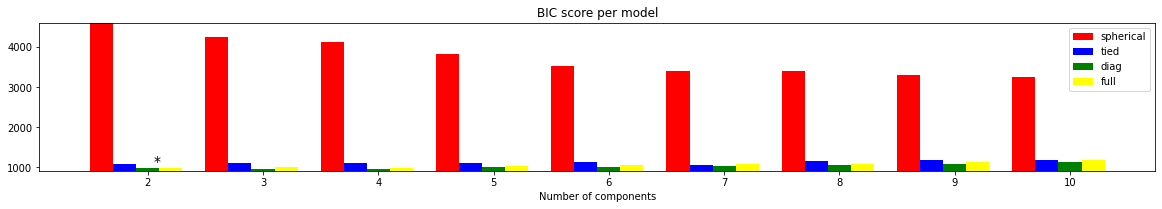

In [ ]:
# The code is developed from the following official documentation
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

# Importing the necessary packages
import numpy as np
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

lowest_bic = np.infty

# Initializing the list for BIC scores
bic = []

# Initializing the number of components between [2,10]
n_components_range = range(2, 11)

# Initializing the covarince types
cv_types = ['spherical', 'tied', 'diag', 'full']

# Fitting the GMM model for all covariance types and all number of components
for cv_type in cv_types:
    for n_components in n_components_range:
      
        # Fitting a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,init_params='kmeans', random_state=20,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['red', 'blue', 'green',
                              'yellow'])
clf = best_gmm
bars = []

# Plotting the BIC scores
plt.figure(figsize=(20, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [ ]:
# Printing the best GMM model
print(clf)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=20, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


**a) Which is the best choice for the clustering? Why?**


Following are the observations from the above result.

*   In the case of GMM, our best result produces a value with **number of components = 3**. 

*   Also it is observed that the best choice of clustering occurs when the **covariance type = 'diag'** i.e. when the covariance type is diagonal. In other words, each component has its own diagonal covariance matrix. 




### b) plot selected model with n_components = 3 and covariance_type='diag'

Text(0.5, 1.0, 'GMM clustering for n_clusters =  3')

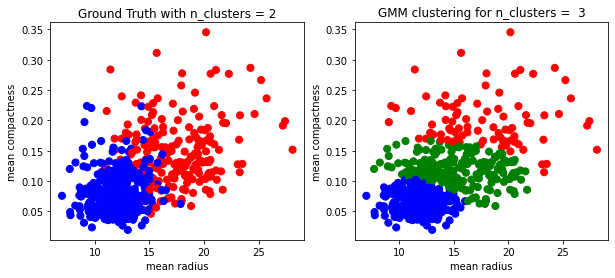

In [ ]:
# some preprocessing
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
X = X[["mean radius", "mean compactness"]]
X.columns = ['mean_radius','mean_compactness']
Y = pd.DataFrame(cancer.target, columns = ["target"])


# Choosing the colours for clustering
colours = np.array(['red','blue','green','cyan','orange','purple','magenta','yellow','maroon', 'brown'])

plt.figure(figsize=(10,4))
c=0

GMM_clustering = mixture.GaussianMixture(n_components=3,init_params='kmeans', random_state=20,
                                      covariance_type='diag')
h = GMM_clustering.fit(X).predict(X)
plt.subplot(1,2,1)
plt.scatter(x=X.mean_radius, y=X.mean_compactness, c=colours[Y.target], s=50)
plt.xlabel("mean radius")
plt.ylabel("mean compactness")
plt.title('Ground Truth with n_clusters = 2')
plt.subplot(1,2,2)
plt.scatter(x=X.mean_radius, y=X.mean_compactness, c=colours[h], s=50)
plt.xlabel("mean radius")
plt.ylabel("mean compactness")
plt.title('GMM clustering for n_clusters =  3')

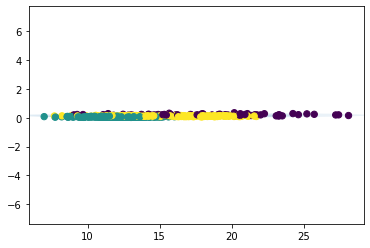

In [ ]:
# some preprocessing
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
X = X[["mean radius", "mean compactness"]]
X.columns = ['mean_radius','mean_compactness']
Y = pd.DataFrame(cancer.target, columns = ["target"])

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plotting_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

GMM_clustering = mixture.GaussianMixture(n_components=3,init_params='kmeans', random_state=20,
                                      covariance_type='diag')

# Converting the X dataframe to Array
X = X.to_numpy()
plotting_gmm(GMM_clustering, X)


## Q2 - 4	


**Which algorithm (k-means or GMM) would you have chosen for the given data and why?**


Both the k-means and the GMM are generated with random_state = 20. Hence, they are eligible for comparison.

In our breast cancer dataset, I would have chosen the k-means clustering over GMM because of the following reaons.

*   For k-means, we are getting the number of clusters really equal to the ground truth values i.e. 2. In case of GMM, the number of clusters is 3 which is kind of over calculated. On the other hand, with k-means we get the number of clusters exactly equal to the ground truth. 

*   K-means is easier to implement algorithmcally and have a better running time as compared to GMM.





## Q2 - 5

**Which benefits do GMMs have over k-means?**

The benefits of GMM over k-means are as follows:

*   GMM incorporates probabilistic cluster assignments with overlaps whereas there are hard cluster assignments as in k-means.

*   GMM can detect ellipsoidal clusters of different sizes unlike k-means which can only detect spherical clusters.

*   The BIC can be used to choose the number of clusters which is quite advantegeous as compared to k-means.

*   The GMM does not assume clusters to be of any geometry as it is capable of working well with non-linear geometric distributions as well.

